In [64]:

import re
import simplejson as json

emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
 
tweet = 'RT @marcobonzanini: just an example! :D http://example.com #NLP'
print(preprocess(tweet))


['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://example.com', '#NLP']


In [ ]:



import subprocess
f = subprocess.Popen(['tail','-F','verge_stream.json'],stdout=subprocess.PIPE,stderr=subprocess.PIPE)
while True:
    line = f.stdout.readline()
    print (line)


In [51]:

files= ["verge_stream.json","neo_stream.json","dash_stream.json"]
import subprocess

nr_tweets={}

for f in files:
    
    val=int(subprocess.check_output(["wc", "-l", f]).split()[0])
    nr_tweets[f]=val
    #output=subprocess.check_output(['wc', '-l', f])
    #print(preprocess(string(output)))


print(nr_tweets)
    

{'verge_stream.json': 725, 'neo_stream.json': 520, 'dash_stream.json': 10}


In [96]:
import pandas as pd
import numpy as np

#pd.DataFrame.from_dict?
df = pd.DataFrame.from_dict(nr_tweets, orient='index')
df=df.rename(index=str, columns={0: "Nr. of Tweets"})






In [186]:


def parse_file(df,filename):
    all_bullish=0
    all_bullish_fcnt=0
    all_bearish=0
    all_bearish_fcnt=0
    with open(filename, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            tokens = preprocess(tweet['text'])
            if('buy' in tokens or 'hold' in tokens or 'jump' in tokens or 'bullish' in tokens):
                all_bullish+=1
                all_bullish_fcnt+=tweet['user']["followers_count"]
                print(tweet['text'])
            if('sell' in tokens or 'bearish' in tokens or 'plumet' in tokens ):
                all_bearish+=1
                all_bearish_fcnt+=tweet['user']["followers_count"]

    df.at[filename, 'Bullish Tweet'] = all_bullish
    df.at[filename, 'Bullish Tweet * Followers'] = all_bullish_fcnt
    df.at[filename, 'Bearish Tweet'] = all_bearish
    df.at[filename, 'Bearish Tweet * Followers'] = all_bearish_fcnt

parse_file(df,filename='verge_stream.json')
parse_file(df,filename='neo_stream.json')
parse_file(df,filename='dash_stream.json')
df




RT @KraToZz94: The funny thing is people think that  #verge is going through a dip😂🙈 take a closer look at those buy/sell orders🙌Making mor…
RT @KraToZz94: #Verge is looking insanely Bullish😱 Do not miss out on this opportunity🙌The buy orders (Demand) are about to take over the s…
RT @VergeLife: @davidgokhshtein  has been very bullish on $XVG, @Haejin_Crypto  has Elliott-waved #verge to a potential $5usd value, now Tr…
Hold your #xvg and buy more or you’ll regret it! #verge #Vergecurrency #VergeCoin #VergeFam #wraithprotocol… https://t.co/rj0GPgCDRz
RT @XVG_Orca: Hold your #xvg and buy more or you’ll regret it! #verge #Vergecurrency #VergeCoin #VergeFam #wraithprotocol #altcoins #bitcoi…
RT @KenBTheAwesome: It's a slow day in the #cryptocurrency world. #HODL that #TRX and #XVG and buy during the dip. The whales can't keep th…
RT @XVGWhaleReal: #XVG by far #1 in volume on #bittrex, I think this dip is going to bounce into a big jump up. $XVG #Verge #Crypto https:/…
RT @XVGWhaleReal: #XV

@kucoincom I just bought a bag. The BEST time to buy this is NOW. Get it here: https://t.co/IdIA57OQub… https://t.co/yfpkPCpycE
#KuCoin melius #COSS, #STeX, #WCX, #binance 🚀 🚀 🚀
Divisi cotidie / feodo transaction buy / bonus invitatio / #NEO… https://t.co/QvDwrnos59
#KuCoin melius #COSS, #STeX, #WCX, #binance 🚀 🚀 🚀
Divisi cotidie / feodo transaction buy / bonus invitatio / #NEO… https://t.co/o9VJAyXI2k
Guys, I have found a helpful guide on how to buy #TRX #TRON #XRP #Ripple #SNT #RDD #BAY #STEEM #NEM #POE #FUN… https://t.co/zEAPTEFuwx
***How you can buy bitcoin or altcoins?***
Binance Cryptocurrency Exhange
Do you want to free All coins wallet?
Do… https://t.co/XJd0mZOIeC
@coindesk ***How you can buy bitcoin or altcoins?***
Binance Cryptocurrency Exhange
Do you want to free All coins w… https://t.co/2IPW4UrXBA
@CGTNOfficial ***How you can buy bitcoin or altcoins?***
Binance Cryptocurrency Exhange
Do you want to free All coi… https://t.co/iWBoUXcxLl
$icx on the move buy the dip!! Icon t

,Nr. of Tweets,Bullish Tweet,Bullish Tweet * Followers,Bearish Tweet,Bearish Tweet * Followers
verge_stream.json,725,60.0,24842.0,20.0,19310.0
neo_stream.json,520,57.0,106234.0,5.0,322.0
dash_stream.json,10,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


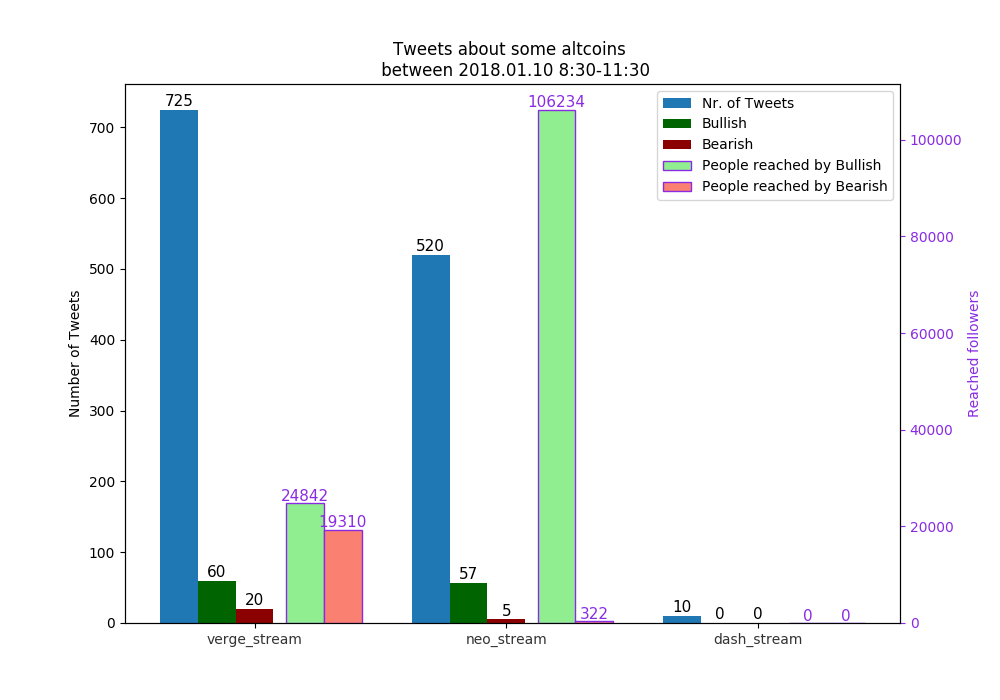

Text(0,0.5,'Number of Tweets')

In [190]:
%matplotlib notebook
import matplotlib.pyplot as plt


def handle_bars(ax,bars,axcolor,mark_edge=True,space_above=500):
    for bar in bars:
        ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()+space_above,
                       str(int(bar.get_height()))+"",
                       ha="center",
                       color=axcolor,fontsize=11)
        if(mark_edge==True):
            bar.set_edgecolor(axcolor)


plt.figure(figsize=(10,7))
N = 3
w=0.15
ind = np.arange(N)
#plt.style.use('seaborn')
plt.rcParams.update(plt.rcParamsDefault)

ax1=plt.gca()
ax1_color='black'
bars1=plt.bar(ind-2*w,df["Nr. of Tweets"], width = w)
handle_bars(ax1,bars1,ax1_color,mark_edge=False,space_above=5)

bars2=plt.bar(ind-w,df["Bullish Tweet"], width = w,color='darkgreen')
handle_bars(ax1,bars2,ax1_color,mark_edge=False,space_above=5)

bars3=plt.bar(ind-0,df["Bearish Tweet"], width = w,color='darkred')
handle_bars(ax1,bars3,ax1_color,mark_edge=False,space_above=5)


plt.title('Tweets about some altcoins \n between 2018.01.10 8:30-11:30')
plt.legend()
x_str=df.index.values
x_str=map(lambda x: x[:-5],x_str)
plt.xticks(ind,x_str,alpha=0.8);


t = np.arange(0.01, 3.0, 0.01)
s1 = np.exp(t)
ax2 = plt.gca().twinx()
ax2_color='blueviolet'
bars4=ax2.bar(ind+w+0.05,df["Bullish Tweet * Followers"], width = w,color='lightgreen')
handle_bars(ax2,bars4,ax2_color)
bars5=ax2.bar(ind+2*w+0.05,df["Bearish Tweet * Followers"], width = w,color='salmon')
handle_bars(ax2,bars5,ax2_color)

#s2 = np.sin(2 * np.pi * t)
#ax2.plot(t, s2, 'r.')
ax2.set_ylabel('Reached followers', color=ax2_color)
ax2.tick_params('y', colors=ax2_color)

plt.legend((bars1[0], bars2[0], bars3[0], bars4[0], bars5[0]), ('Nr. of Tweets', 'Bullish', 'Bearish','People reached by Bullish','People reached by Bearish'))
ax1.set_ylabel('Number of Tweets', color=ax1_color)


In [138]:


plt.style.available





['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2']